# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

## Алгоритм Флойда-Уоршелла

[0, 3, 1, 3, inf, inf]
[3, 0, 4, inf, inf, inf]
[1, 4, 0, inf, 7, 5]
[3, inf, inf, 0, inf, 2]
[inf, inf, 7, inf, 0, 4]
[inf, inf, 5, 2, 4, 0]
[1, 0]


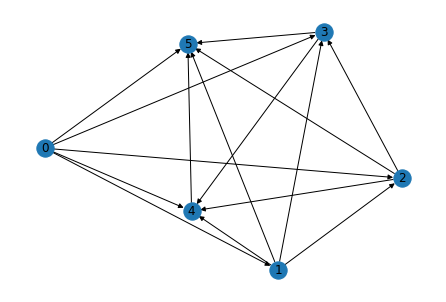

In [49]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np

try:
  # считываем текстовый файл
#     with open("C:/Users/Денис/Python_SIAOD/SIAOD_Denis_Smirnov/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
    with open("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
        matrix = [[int(num) for num in line.split(',')] for line in fileDij] # загружаем матрицу дорог графа
        
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if i!=j and matrix[i][j]==0:
                    matrix[i][j] = math.inf
        
        for i in matrix:  
            print(i)
            
        def get_path(P, u, v):
            # Сначала записываем в список path пройденных путей конечную вершину
            path = [u]
            # Будем записывать в path все вершины, пока не придем до начальной
            while u != v:
                # Номер промежуточной вершины
                u = P[u][v]
                path.append(u)
            return path
    
        # Число вершин в графе
        N = len(matrix) 
        # Начальный список предыдущих вершин для поиска кратчайших маршрутов
        P = [[v for v in range(N)] for u in range(N)] 
        
        # Реализация алгоритма Флойда-Уоршелла
        for k in range(N):
            for i in range(N):
                for j in range(N):
                    # Проходимся по дополнительным вершинам к
                    d = matrix[i][k] + matrix[k][j]
                    # Если маршрут через доп. точки оказался меньше, чем тот, который был в самой матрице,
                    # то сохраняем его и сохраняем номер вершины к, через которую нужно пройти
                    if matrix[i][j] > d:
                        matrix[i][j] = d
                        P[i][j] = k
        
        end = 1
        start = 0
        print(get_path(P, end, start))
        
        graph = nx.Graph(np.matrix(matrix))
        nx.draw(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=300, arrows=True)
        
except FileNotFoundError:
    print("Файл не был найден") 

## Алгоритм Дейкстры

[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]
N=  6
Длины кратчайших путей от вершины 1 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]


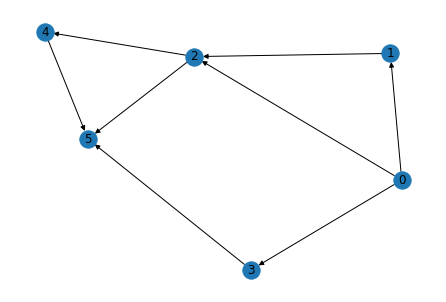

In [39]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np

try:
  #считываем текстовый файл
#     with open("C:/Users/Денис/Python_SIAOD/SIAOD_Denis_Smirnov/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
    with open("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
        matrix = [[int(num) for num in line.split(',')] for line in fileDij] #загружаем матрицу дорог графа
        
        for i in matrix:  
            print(i)
        
        N = len(matrix) #число вершин в нашем графе
        print("N= ", N)
        T = [math.inf] * N #финальная строка длин (inf - бесконечность)
        startV = 0 #стартовая вершина
        viewedV = {startV} #множество просмотренных вершин (в зависимости от старnовой вершины)
        T[startV] = 0 #нулевой вес стартовой вершины должен быть равен 0!

        #метод перебора всех связанных вершин
        #просматриваем все веса других, связанных с startV вершин, и возвращаем вершину с мин.значением
        def getLinkWithV(startV, matrix):
            for i, weight in enumerate(matrix[startV]): #берём веса в графе 
                if (weight > 0):
                    yield i

        #метод нахождения в таблицы вершины с мин.весом
        def findMinWei(T, viewedV):
            amin = -1 #начальный минимум, начальное состояние
            m = max(T) #находим макс.значение финимальной строки
            for i, t in enumerate(T):
                if (t < m and i not in viewedV): #находим мин.значение вершин, которые не были ещё рассмотрены
                    m = t
                    amin = i
            return amin #возвращаем вершину с мин.значением

        #заполяем T-табличку мин.весами
        while (startV != -1): #цикл для прохождению по вершинам (если -1, то по всем вершинам прошли)
            for j in getLinkWithV(startV, matrix): #перебераем все связанные вершины с вершиной startV
                if (j not in viewedV): #если рассматриваемая строка таблицы не была просмотрена
                    wei = T[startV] + matrix[startV][j] #получаем путь, что прошли до минимальной вершины
                if (wei < T[j]): #если вес меньше последней позиции нашей финальной строки
                    T[j] = wei #присваиваем минимальное значение, то есть меняем мин.длину
          #должны найти мин.аргумент между последней строчкой и множеством, что уже было просмотрено
            startV = findMinWei(T, viewedV) #находим мин.значение вершины
            if (startV > 0):
                viewedV.add(startV)
        print("Длины кратчайших путей от вершины 1 до всех остальных вершин соотвественно: ")
        print(T)
        
        graph = nx.Graph(np.matrix(matrix))
        nx.draw(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=300, arrows=True)
        
except FileNotFoundError:
    print("Файл не был найден") 

### Вывод